<a href="https://colab.research.google.com/github/FrenchFreis/CCADMACL_EXAM_COM222ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [587]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [588]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

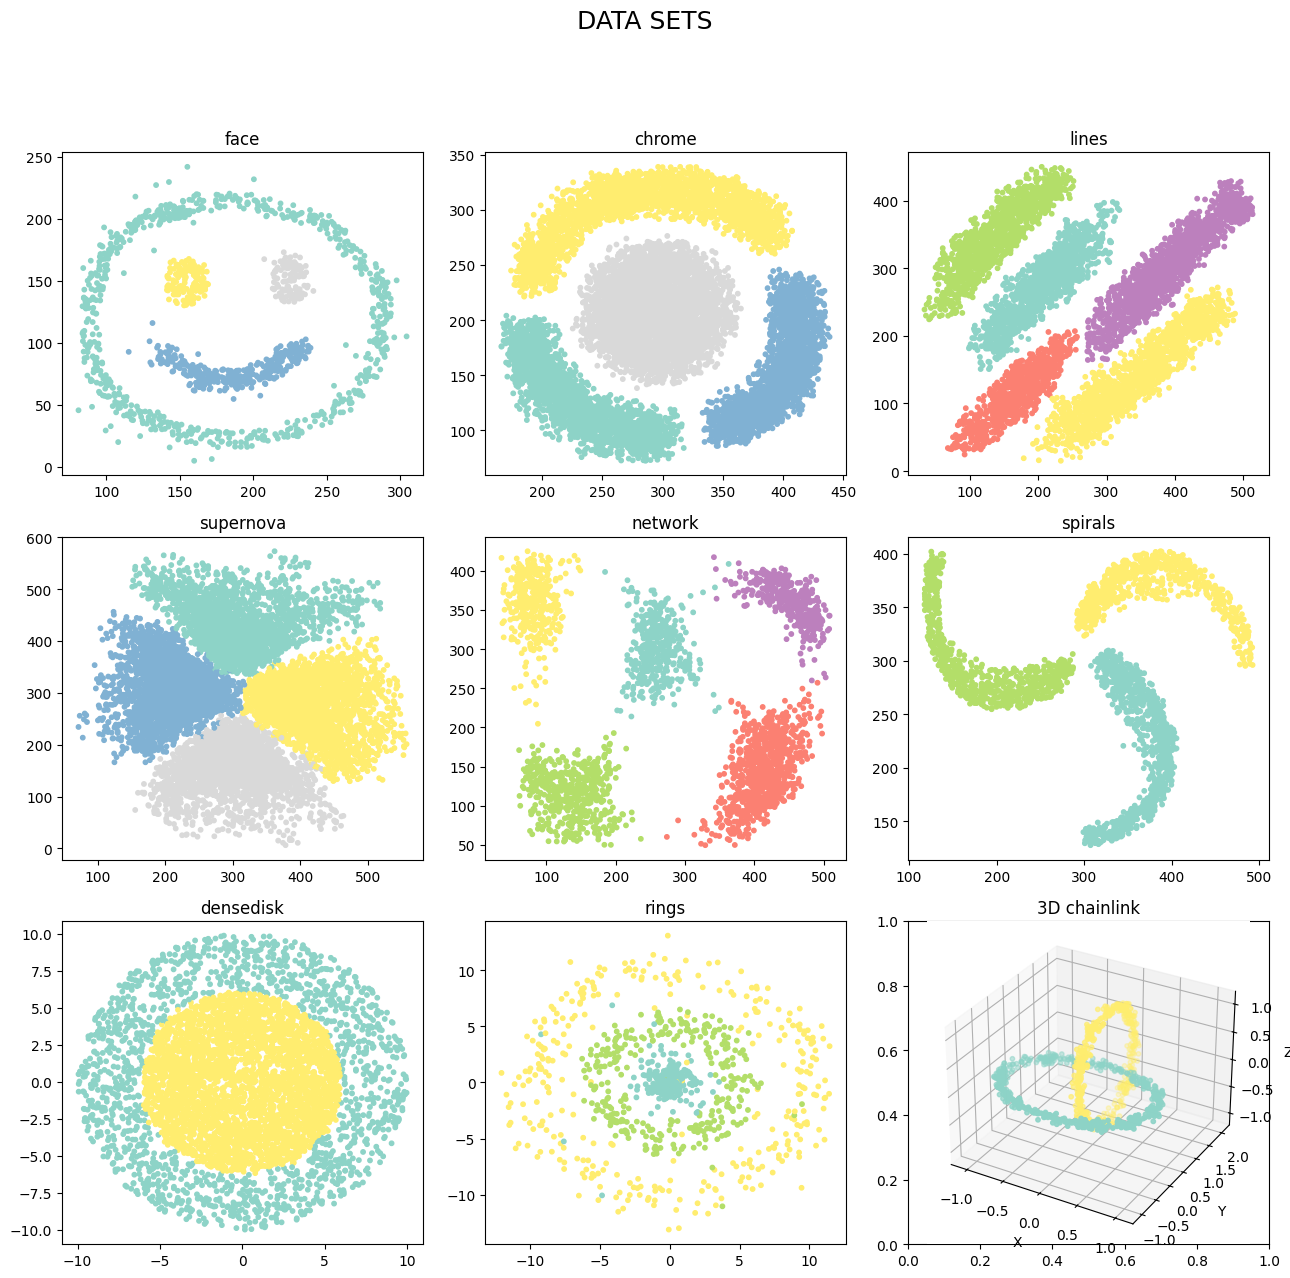

In [589]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [590]:
face_df_kmeans = face_df.copy()
chrome_df_kmeans = chrome_df.copy()
lines2_df_kmeans = lines2_df.copy()
supernova_df_kmeans = supernova_df.copy()
network_df_kmeans = network_df.copy()
spirals_df_kmeans = spirals_df.copy()
densedisk_df_kmeans = densedisk_df.copy()
rings_df_kmeans = rings_df.copy()
chainlink_df_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [591]:
face_df_kmeans = face_df_kmeans.drop('color', axis=1)
chrome_df_kmeans = chrome_df_kmeans.drop('color', axis=1)
lines2_df_kmeans = lines2_df_kmeans.drop('color', axis=1)
supernova_df_kmeans = supernova_df_kmeans.drop('color', axis=1)
network_df_kmeans = network_df_kmeans.drop('color', axis=1)
spirals_df_kmeans = spirals_df_kmeans.drop('color', axis=1)
densedisk_df_kmeans = densedisk_df_kmeans.drop('color', axis=1)
rings_df_kmeans = rings_df_kmeans.drop('color', axis=1)
chainlink_df_kmeans = chainlink_df_kmeans.drop('color', axis=1)

3. Train a K-means model for each dataset.

In [592]:
face_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
chrome_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
lines2_kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
supernova_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
network_kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
spirals_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
densedisk_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
rings_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
chainlink_kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)


4. Add a "Cluster" column for each data set

In [593]:
y_face_df_kmeans = face_kmeans.fit_predict(face_df_kmeans)
y_chrome_df_kmeans = chrome_kmeans.fit_predict(chrome_df_kmeans)
y_lines2_df_kmeans = lines2_kmeans.fit_predict(lines2_df_kmeans)
y_supernova_df_kmeans = supernova_kmeans.fit_predict(supernova_df_kmeans)
y_network_df_kmeans = network_kmeans.fit_predict(network_df_kmeans)
y_spirals_df_kmeans = spirals_kmeans.fit_predict(spirals_df_kmeans)
y_densedisk_df_kmeans = densedisk_kmeans.fit_predict(densedisk_df_kmeans)
y_rings_df_kmeans = rings_kmeans.fit_predict(rings_df_kmeans)
y_chainlink_df_kmeans = chainlink_kmeans.fit_predict(chainlink_df_kmeans)

In [594]:
face_df_kmeans['Cluster'] = y_face_df_kmeans
chrome_df_kmeans['Cluster'] = y_chrome_df_kmeans
lines2_df_kmeans['Cluster'] = y_lines2_df_kmeans
supernova_df_kmeans['Cluster'] = y_supernova_df_kmeans
network_df_kmeans['Cluster'] = y_network_df_kmeans
spirals_df_kmeans['Cluster'] = y_spirals_df_kmeans
densedisk_df_kmeans['Cluster'] = y_densedisk_df_kmeans
rings_df_kmeans['Cluster'] = y_rings_df_kmeans
chainlink_df_kmeans['Cluster'] = y_chainlink_df_kmeans

5. Plot the Correct cluster and the K-means cluster

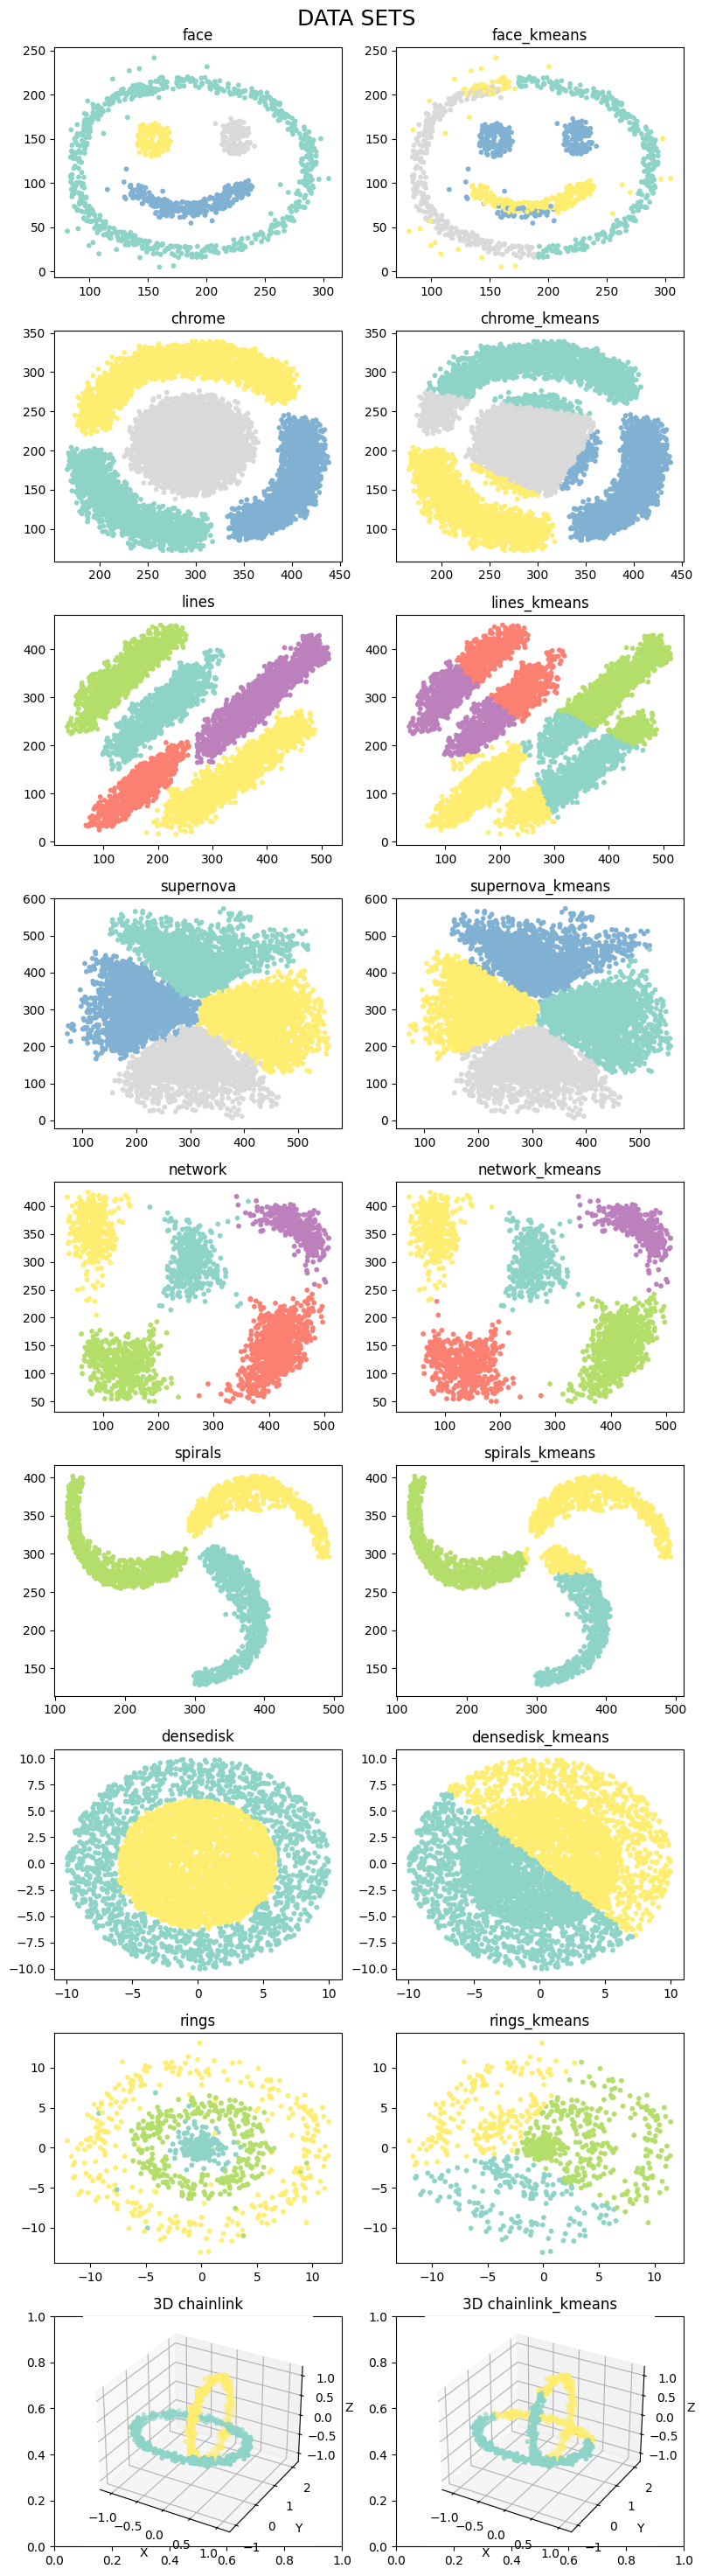

In [595]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(face_df_kmeans['x'], face_df_kmeans['y'], c=face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face_kmeans")

axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(chrome_df_kmeans['x'], chrome_df_kmeans['y'], c=chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome_kmeans")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(lines2_df_kmeans['x'], lines2_df_kmeans['y'], c=lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines_kmeans")

axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(supernova_df_kmeans['x'], supernova_df_kmeans['y'], c=supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova_kmeans")

axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(network_df_kmeans['x'], network_df_kmeans['y'], c=network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network_kmeans")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(spirals_df_kmeans['x'], spirals_df_kmeans['y'], c=spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals_kmeans")

axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(densedisk_df_kmeans['x'], densedisk_df_kmeans['y'], c=densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk_kmeans")

axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(rings_df_kmeans['x'], rings_df_kmeans['y'], c=rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings_kmeans")

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_kmeans")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])

## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [596]:
face_df_agglomerative = face_df.copy()
chrome_df_agglomerative = chrome_df.copy()
lines2_df_agglomerative = lines2_df.copy()
supernova_df_agglomerative = supernova_df.copy()
network_df_agglomerative = network_df.copy()
spirals_df_agglomerative = spirals_df.copy()
densedisk_df_agglomerative = densedisk_df.copy()
rings_df_agglomerative = rings_df.copy()
chainlink_df_agglomerative = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [597]:
face_df_agglomerative = face_df_agglomerative.drop('color', axis=1)
chrome_df_agglomerative = chrome_df_agglomerative.drop('color', axis=1)
lines2_df_agglomerative = lines2_df_agglomerative.drop('color', axis=1)
supernova_df_agglomerative = supernova_df_agglomerative.drop('color', axis=1)
network_df_agglomerative = network_df_agglomerative.drop('color', axis=1)
spirals_df_agglomerative = spirals_df_agglomerative.drop('color', axis=1)
densedisk_df_agglomerative = densedisk_df_agglomerative.drop('color', axis=1)
rings_df_agglomerative = rings_df_agglomerative.drop('color', axis=1)
chainlink_df_agglomerative = chainlink_df_agglomerative.drop('color', axis=1)

3. Train a Agglomerative Clustering model for each dataset.

In [598]:
face_AgglomerativeC = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
chrome_AgglomerativeC = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
lines2_AgglomerativeC = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
supernova_AgglomerativeC = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage = 'ward')
network_AgglomerativeC = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage = 'ward')
spirals_AgglomerativeC = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
densedisk_AgglomerativeC = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')
rings_AgglomerativeC = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
chainlink_AgglomerativeC = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage = 'ward')

y_face_df_agglomerative = face_AgglomerativeC.fit_predict(face_df_agglomerative)
y_chrome_df_agglomerative = chrome_AgglomerativeC.fit_predict(chrome_df_agglomerative)
y_lines2_df_agglomerative = lines2_AgglomerativeC.fit_predict(lines2_df_agglomerative)
y_supernova_df_agglomerative = supernova_AgglomerativeC.fit_predict(supernova_df_agglomerative)
y_network_df_agglomerative = network_AgglomerativeC.fit_predict(network_df_agglomerative)
y_spirals_df_agglomerative = spirals_AgglomerativeC.fit_predict(spirals_df_agglomerative)
y_densedisk_df_agglomerative = densedisk_AgglomerativeC.fit_predict(densedisk_df_agglomerative)
y_rings_df_agglomerative = rings_AgglomerativeC.fit_predict(rings_df_agglomerative)
y_chainlink_df_agglomerative = chainlink_AgglomerativeC.fit_predict(chainlink_df_agglomerative)


4. Add a "Cluster" column for each data set

In [599]:
face_df_agglomerative['Cluster'] = y_face_df_agglomerative
chrome_df_agglomerative['Cluster'] = y_chrome_df_agglomerative
lines2_df_agglomerative['Cluster'] = y_lines2_df_agglomerative
supernova_df_agglomerative['Cluster'] = y_supernova_df_agglomerative
network_df_agglomerative['Cluster'] = y_network_df_agglomerative
spirals_df_agglomerative['Cluster'] = y_spirals_df_agglomerative
densedisk_df_agglomerative['Cluster'] = y_densedisk_df_agglomerative
rings_df_agglomerative['Cluster'] = y_rings_df_agglomerative
chainlink_df_agglomerative['Cluster'] = y_chainlink_df_agglomerative


5. Plot the Correct cluster and the Agglomerative cluster

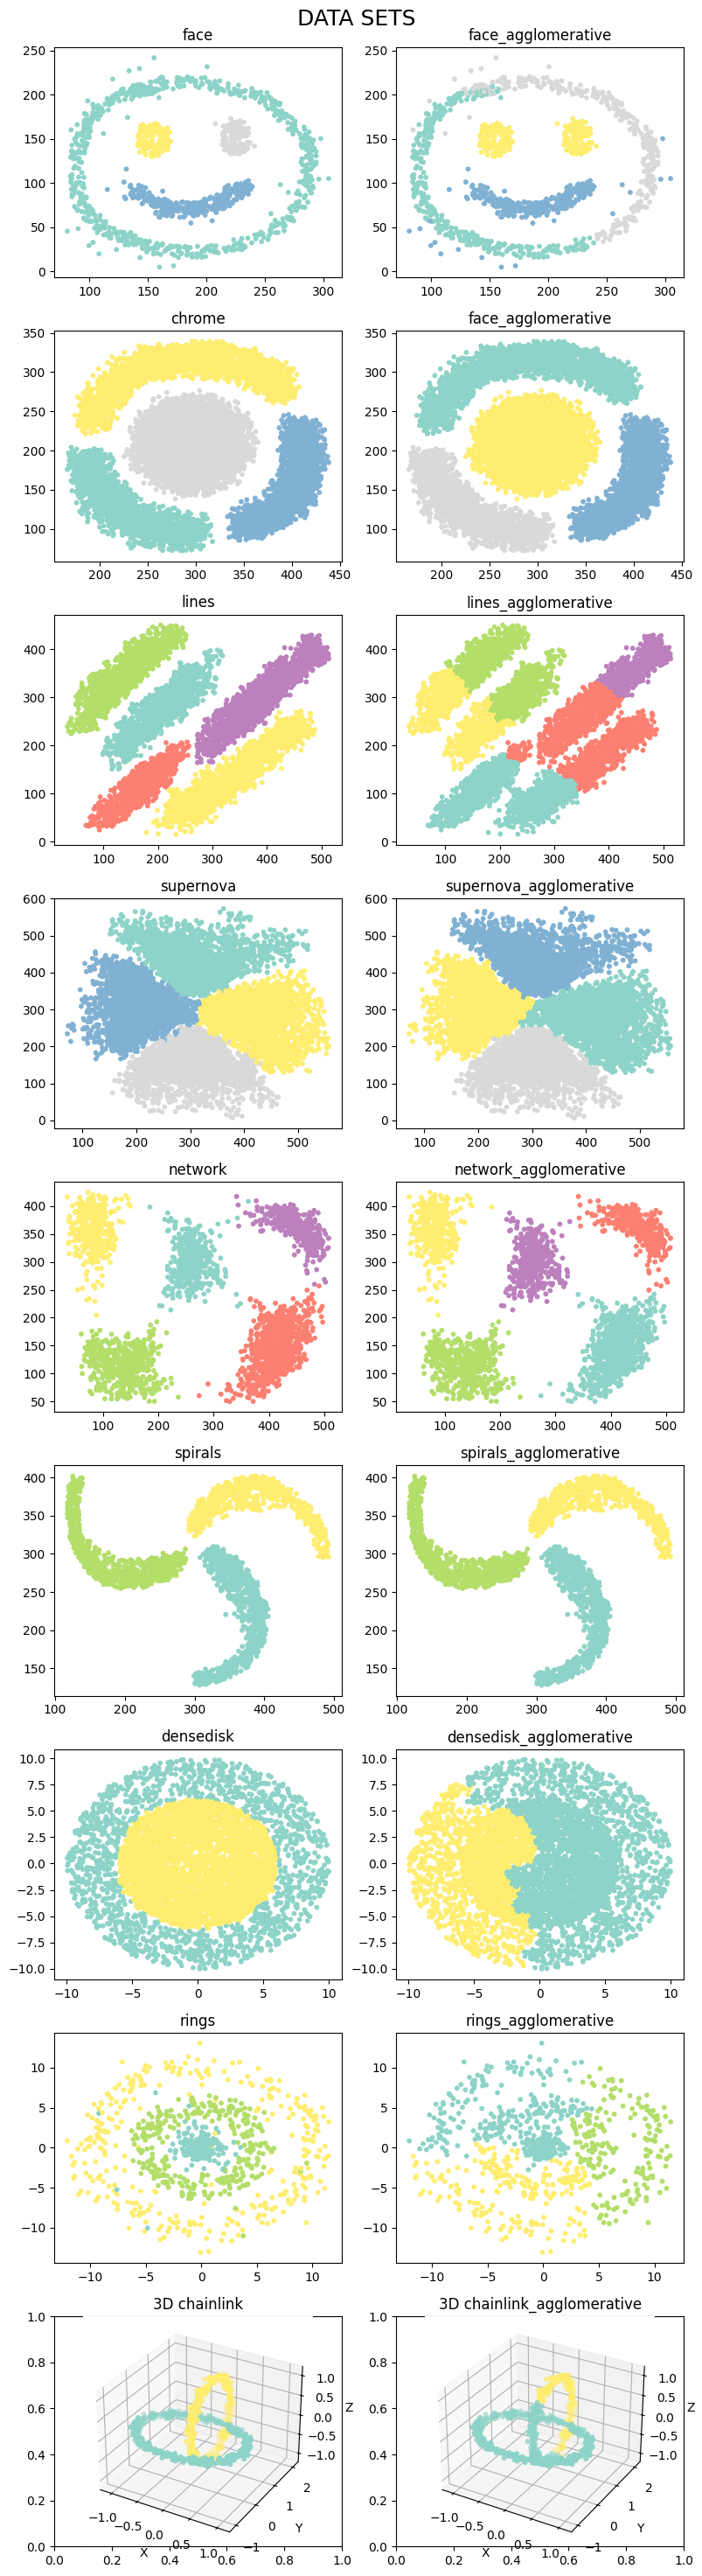

In [600]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(face_df_agglomerative['x'], face_df_agglomerative['y'], c=face_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face_agglomerative")

axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(chrome_df_agglomerative['x'], chrome_df_agglomerative['y'], c=chrome_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("face_agglomerative")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(lines2_df_agglomerative['x'], lines2_df_agglomerative['y'], c=lines2_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines_agglomerative")

axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(supernova_df_agglomerative['x'], supernova_df_agglomerative['y'], c=supernova_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova_agglomerative")

axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(network_df_agglomerative['x'], network_df_agglomerative['y'], c=network_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network_agglomerative")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(spirals_df_agglomerative['x'], spirals_df_agglomerative['y'], c=spirals_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals_agglomerative")


axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(densedisk_df_agglomerative['x'], densedisk_df_agglomerative['y'], c=densedisk_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk_agglomerative")

axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(rings_df_agglomerative['x'], rings_df_agglomerative['y'], c=rings_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings_agglomerative")

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_agglomerative['x'], chainlink_df_agglomerative['y'], chainlink_df_agglomerative['z'], c=chainlink_df_agglomerative['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_agglomerative")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [601]:
face_df_dbscan = face_df.copy()
chrome_df_dbscan = chrome_df.copy()
lines2_df_dbscan = lines2_df.copy()
supernova_df_dbscan = supernova_df.copy()
network_df_dbscan = network_df.copy()
spirals_df_dbscan = spirals_df.copy()
densedisk_df_dbscan = densedisk_df.copy()
rings_df_dbscan = rings_df.copy()
chainlink_df_dbscan = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [602]:
face_df_dbscan = face_df_dbscan.drop('color', axis=1)
chrome_df_dbscan = chrome_df_dbscan.drop('color', axis=1)
lines2_df_dbscan = lines2_df_dbscan.drop('color', axis=1)
supernova_df_dbscan = supernova_df_dbscan.drop('color', axis=1)
network_df_dbscan = network_df_dbscan.drop('color', axis=1)
spirals_df_dbscan = spirals_df_dbscan.drop('color', axis=1)
densedisk_df_dbscan = densedisk_df_dbscan.drop('color', axis=1)
rings_df_dbscan = rings_df_dbscan.drop('color', axis=1)
chainlink_df_dbscan = chainlink_df_dbscan.drop('color', axis=1)

3. Train a DBSCAN Clustering model for each dataset.

In [623]:
face_DBScan = DBSCAN(eps=20, min_samples=5, metric='euclidean') #1274 done?
chrome_DBScan = DBSCAN(eps=10, min_samples=5, metric='euclidean') #11094 DONE
lines2_DBScan = DBSCAN(eps=17, min_samples=20, metric='euclidean') #6169 done?
supernova_DBScan = DBSCAN(eps=11, min_samples=22, metric='euclidean') #10715
network_DBScan = DBSCAN(eps=21, min_samples=4, metric='euclidean') #2635
spirals_DBScan = DBSCAN(eps=15, min_samples=5, metric='euclidean') #2329 DONE
densedisk_DBScan = DBSCAN(eps=0.8, min_samples=45, metric='euclidean') #5001 done?
rings_DBScan = DBSCAN(eps=2, min_samples=30, metric='euclidean') #1001
chainlink_DBScan = DBSCAN(eps=0.8, min_samples=10, metric='euclidean') #1001 done

y_face_df_dbscan = face_DBScan.fit_predict(face_df_dbscan)
y_chrome_df_dbscan = chrome_DBScan.fit_predict(chrome_df_dbscan)
y_lines2_df_dbscan = lines2_DBScan.fit_predict(lines2_df_dbscan)
y_supernova_df_dbscan = supernova_DBScan.fit_predict(supernova_df_dbscan)
y_network_df_dbscan = network_DBScan.fit_predict(network_df_dbscan)
y_spirals_df_dbscan = spirals_DBScan.fit_predict(spirals_df_dbscan)
y_densedisk_df_dbscan = densedisk_DBScan.fit_predict(densedisk_df_dbscan)
y_rings_df_dbscan = rings_DBScan.fit_predict(rings_df_dbscan)
y_chainlink_df_dbscan = chainlink_DBScan.fit_predict(chainlink_df_dbscan)

4. Add a "Cluster" column for each data set

In [624]:
face_df_dbscan['Cluster'] = y_face_df_dbscan
chrome_df_dbscan['Cluster'] = y_chrome_df_dbscan
lines2_df_dbscan['Cluster'] = y_lines2_df_dbscan
supernova_df_dbscan['Cluster'] = y_supernova_df_dbscan
network_df_dbscan['Cluster'] = y_network_df_dbscan
spirals_df_dbscan['Cluster'] = y_spirals_df_dbscan
densedisk_df_dbscan['Cluster'] = y_densedisk_df_dbscan
rings_df_dbscan['Cluster'] = y_rings_df_dbscan
chainlink_df_dbscan['Cluster'] = y_chainlink_df_dbscan

5. Plot the Correct cluster and the DBSCAN cluster

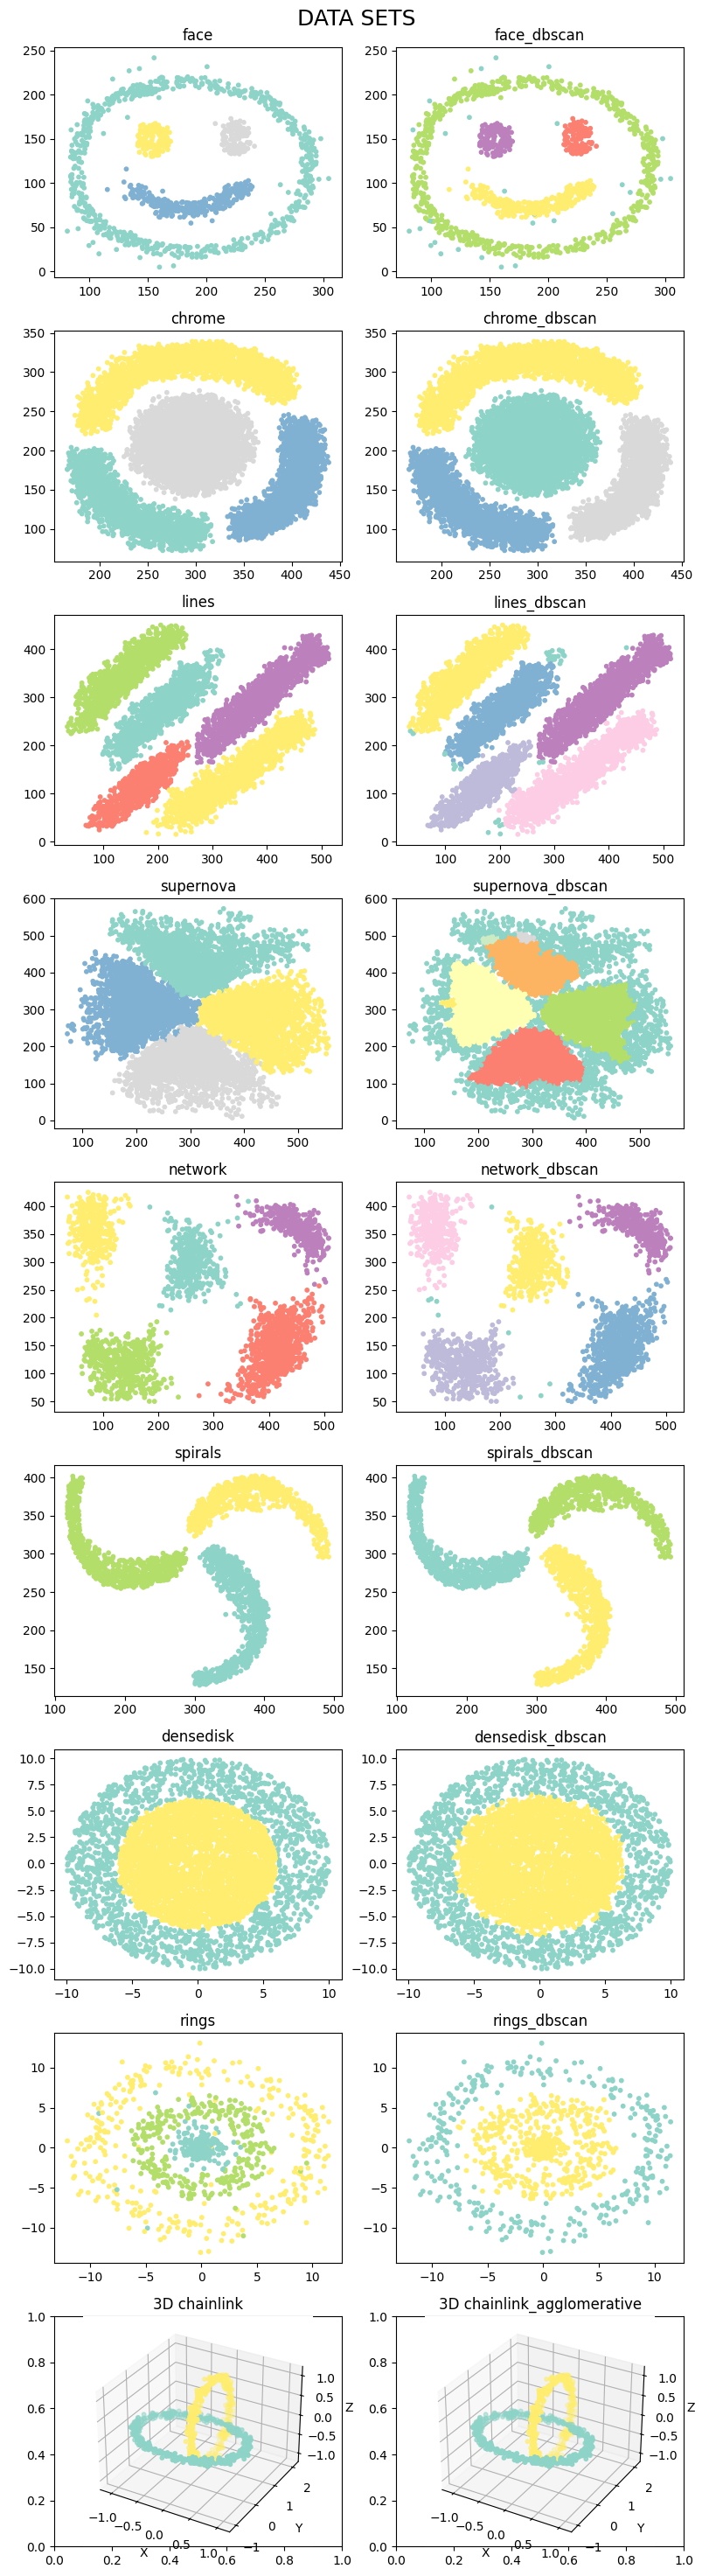

In [625]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(face_df_dbscan['x'], face_df_dbscan['y'], c=face_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face_dbscan")

axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(chrome_df_dbscan['x'], chrome_df_dbscan['y'], c=chrome_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome_dbscan")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(lines2_df_dbscan['x'], lines2_df_dbscan['y'], c=lines2_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines_dbscan")

axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(supernova_df_dbscan['x'], supernova_df_dbscan['y'], c=supernova_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova_dbscan")

axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(network_df_dbscan['x'], network_df_dbscan['y'], c=network_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network_dbscan")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(spirals_df_dbscan['x'], spirals_df_dbscan['y'], c=spirals_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals_dbscan")


axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(densedisk_df_dbscan['x'], densedisk_df_dbscan['y'], c=densedisk_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk_dbscan")

axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(rings_df_dbscan['x'], rings_df_dbscan['y'], c=rings_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings_dbscan")

# Add a 3D plot
ax3d = fig.add_subplot(9, 2, 17, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 2, 18, projection='3d')
ax3d.scatter(chainlink_df_dbscan['x'], chainlink_df_dbscan['y'], chainlink_df_dbscan['z'], c=chainlink_df_dbscan['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_agglomerative")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

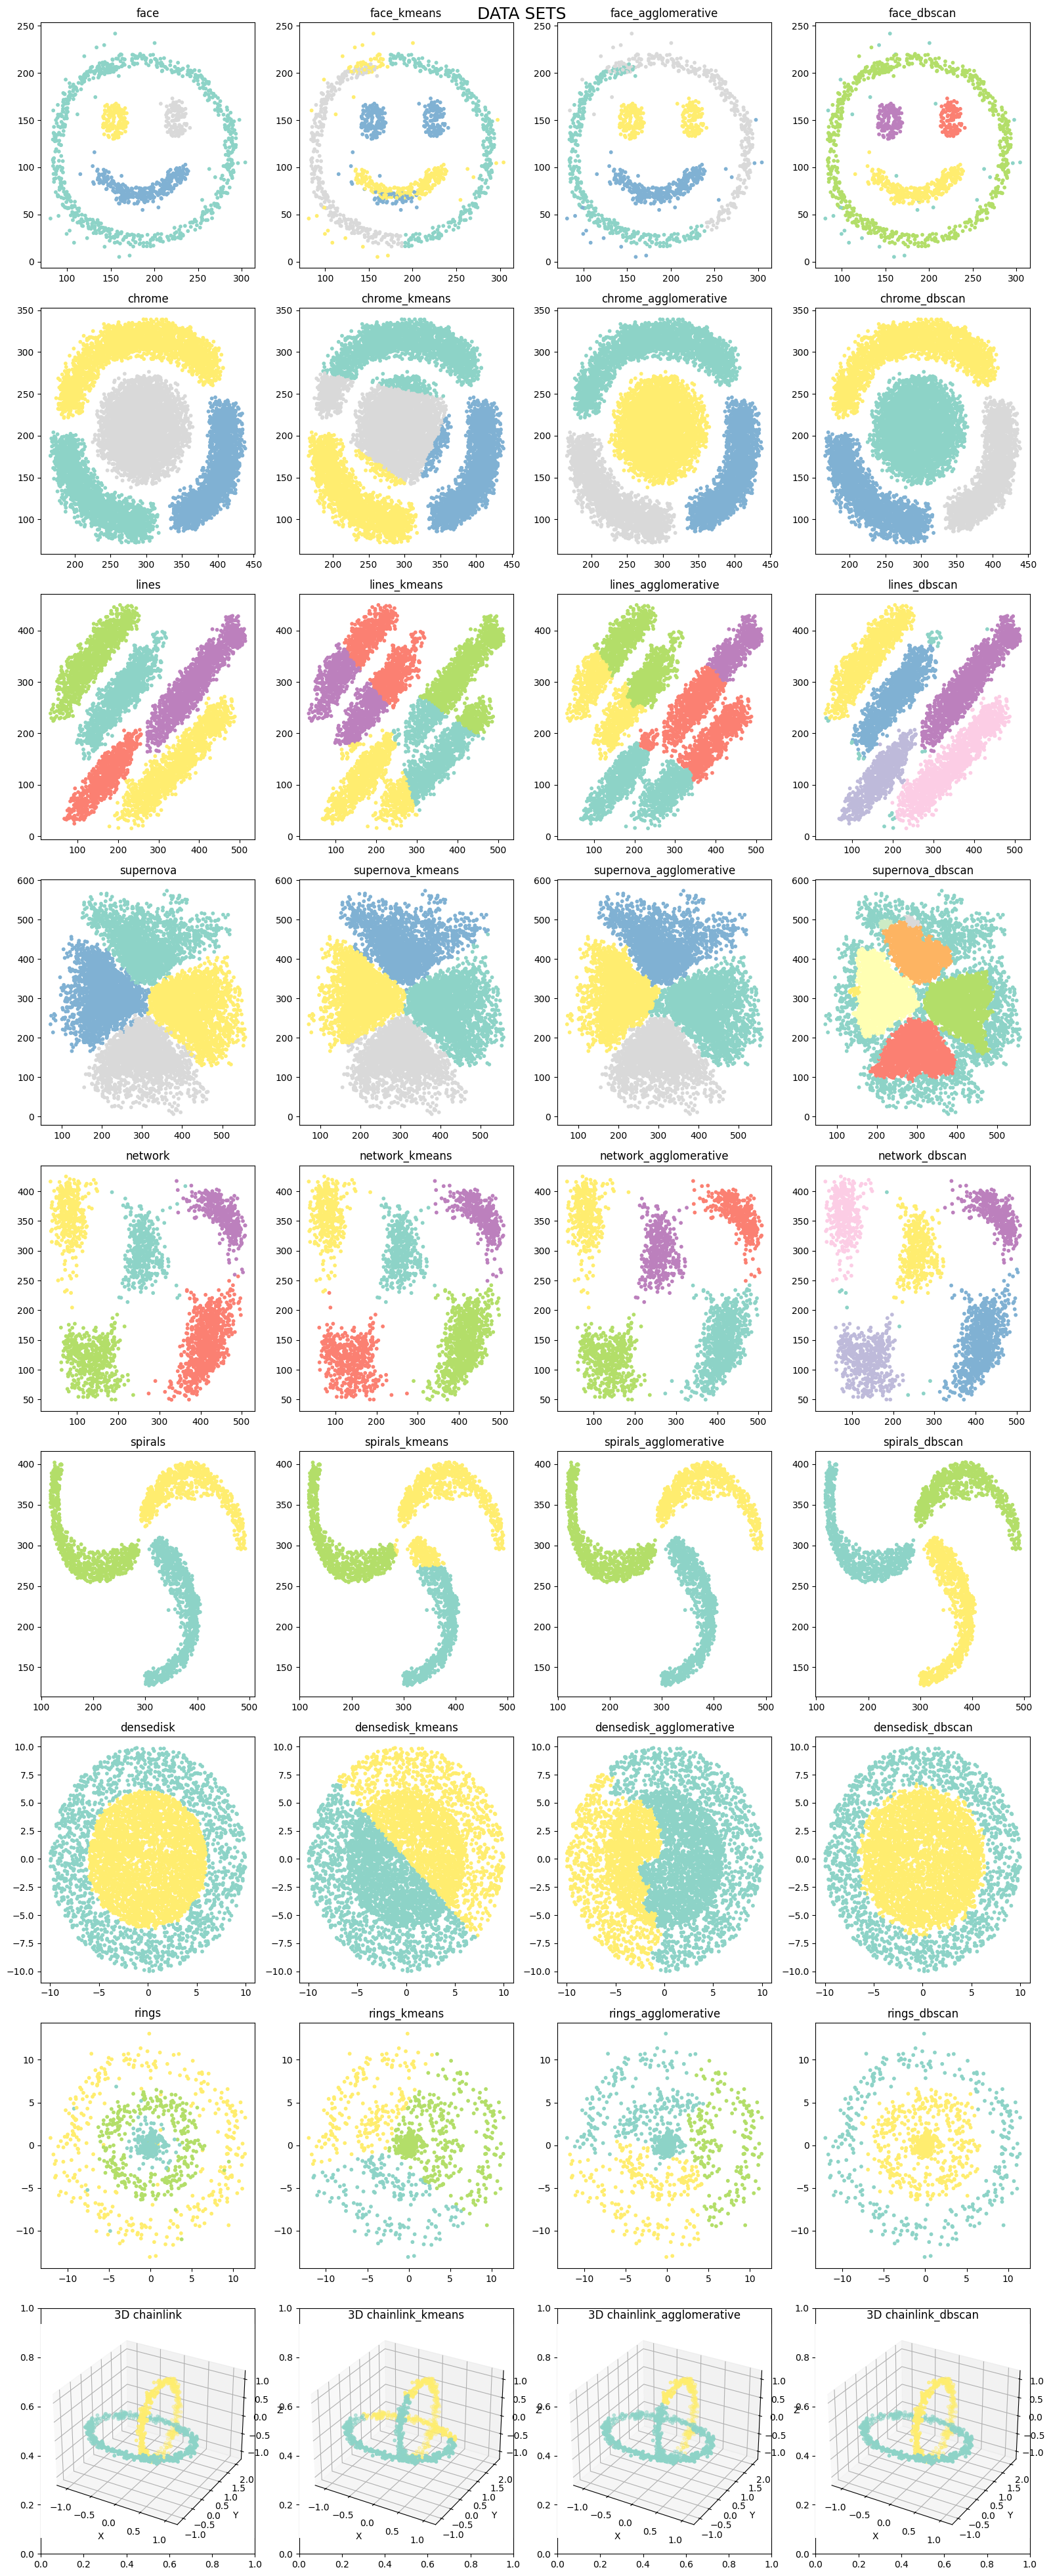

In [626]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(16, 40))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")
axes[0, 1].scatter(face_df_kmeans['x'], face_df_kmeans['y'], c=face_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[0, 1].set_title("face_kmeans")
axes[0, 2].scatter(face_df_agglomerative['x'], face_df_agglomerative['y'], c=face_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[0, 2].set_title("face_agglomerative")
axes[0, 3].scatter(face_df_dbscan['x'], face_df_dbscan['y'], c=face_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[0, 3].set_title("face_dbscan")

axes[1, 0].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("chrome")
axes[1, 1].scatter(chrome_df_kmeans['x'], chrome_df_kmeans['y'], c=chrome_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[1, 1].set_title("chrome_kmeans")
axes[1, 2].scatter(chrome_df_agglomerative['x'], chrome_df_agglomerative['y'], c=chrome_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[1, 2].set_title("chrome_agglomerative")
axes[1, 3].scatter(chrome_df_dbscan['x'], chrome_df_dbscan['y'], c=chrome_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[1, 3].set_title("chrome_dbscan")

axes[2, 0].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("lines")
axes[2, 1].scatter(lines2_df_kmeans['x'], lines2_df_kmeans['y'], c=lines2_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[2, 1].set_title("lines_kmeans")
axes[2, 2].scatter(lines2_df_agglomerative['x'], lines2_df_agglomerative['y'], c=lines2_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[2, 2].set_title("lines_agglomerative")
axes[2, 3].scatter(lines2_df_dbscan['x'], lines2_df_dbscan['y'], c=lines2_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[2, 3].set_title("lines_dbscan")

axes[3, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[3, 0].set_title("supernova")
axes[3, 1].scatter(supernova_df_kmeans['x'], supernova_df_kmeans['y'], c=supernova_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[3, 1].set_title("supernova_kmeans")
axes[3, 2].scatter(supernova_df_agglomerative['x'], supernova_df_agglomerative['y'], c=supernova_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[3, 2].set_title("supernova_agglomerative")
axes[3, 3].scatter(supernova_df_dbscan['x'], supernova_df_dbscan['y'], c=supernova_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[3, 3].set_title("supernova_dbscan")

axes[4, 0].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[4, 0].set_title("network")
axes[4, 1].scatter(network_df_kmeans['x'], network_df_kmeans['y'], c=network_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[4, 1].set_title("network_kmeans")
axes[4, 2].scatter(network_df_agglomerative['x'], network_df_agglomerative['y'], c=network_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[4, 2].set_title("network_agglomerative")
axes[4, 3].scatter(network_df_dbscan['x'], network_df_dbscan['y'], c=network_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[4, 3].set_title("network_dbscan")

axes[5, 0].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[5, 0].set_title("spirals")
axes[5, 1].scatter(spirals_df_kmeans['x'], spirals_df_kmeans['y'], c=spirals_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[5, 1].set_title("spirals_kmeans")
axes[5, 2].scatter(spirals_df_agglomerative['x'], spirals_df_agglomerative['y'], c=spirals_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[5, 2].set_title("spirals_agglomerative")
axes[5, 3].scatter(spirals_df_dbscan['x'], spirals_df_dbscan['y'], c=spirals_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[5, 3].set_title("spirals_dbscan")

axes[6, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[6, 0].set_title("densedisk")
axes[6, 1].scatter(densedisk_df_kmeans['x'], densedisk_df_kmeans['y'], c=densedisk_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[6, 1].set_title("densedisk_kmeans")
axes[6, 2].scatter(densedisk_df_agglomerative['x'], densedisk_df_agglomerative['y'], c=densedisk_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[6, 2].set_title("densedisk_agglomerative")
axes[6, 3].scatter(densedisk_df_dbscan['x'], densedisk_df_dbscan['y'], c=densedisk_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[6, 3].set_title("densedisk_dbscan")

axes[7, 0].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[7, 0].set_title("rings")
axes[7, 1].scatter(rings_df_kmeans['x'], rings_df_kmeans['y'], c=rings_df_kmeans['Cluster'], s=10, cmap="Set3")
axes[7, 1].set_title("rings_kmeans")
axes[7, 2].scatter(rings_df_agglomerative['x'], rings_df_agglomerative['y'], c=rings_df_agglomerative['Cluster'], s=10, cmap="Set3")
axes[7, 2].set_title("rings_agglomerative")
axes[7, 3].scatter(rings_df_dbscan['x'], rings_df_dbscan['y'], c=rings_df_dbscan['Cluster'], s=10, cmap="Set3")
axes[7, 3].set_title("rings_dbscan")

# Add a 3D plot
ax3d = fig.add_subplot(9, 4, 33, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 34, projection='3d')
ax3d.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_kmeans")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 35, projection='3d')
ax3d.scatter(chainlink_df_agglomerative['x'], chainlink_df_agglomerative['y'], chainlink_df_agglomerative['z'], c=chainlink_df_agglomerative['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_agglomerative")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

ax3d = fig.add_subplot(9, 4, 36, projection='3d')
ax3d.scatter(chainlink_df_dbscan['x'], chainlink_df_dbscan['y'], chainlink_df_dbscan['z'], c=chainlink_df_dbscan['Cluster'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink_dbscan")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])